# Feature Mapping

This notebook guides the user through the feature mapping modules we provide in `HARDy` to evaluate the features through each layers of a trained model

*Please note that the feature mapping is only available on MASTER branch due to unavailabiliy of the continous integration tool. In version 1.1, it will be available through conda install*

In [2]:
import hardy
import os
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## Step 1: Importing saved trained model

In [3]:
trained_model = hardy.save_load_model('./best_model.h5', load=True)

2021-12-17 11:18:10.735085: I tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2021-12-17 11:18:10.752896: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fde9f65c800 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-17 11:18:10.752911: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


## Step 2: Extraction of example data set

In [4]:
!tar -xzf new_data_set.tar.gz

## Step 3: Applying transformation on data set

* Defining the transformation configuration path. For best results, It should be same transformation on which CNN model has been trained

In [5]:
transformation_config_path = './scattering_tform_config.yaml'

* Sorting out for `.csv` files only in the extracted example data set

In [6]:
new_data_file_list = [item for item in os.listdir('./new_data_set/') if item.endswith('.csv')]

* Loading the transformation configuration into the notebook

In [7]:
tform_command_list, tform_command_dict = hardy.arbitrage.import_tform_config(transformation_config_path)

Successfully Loaded 1 Transforms to Try!


* Defining the parameters required for transformation. The `scale` and `target_size` should be same on which CNN model has been trained

In [9]:
run_name = 'log_q_der_I'
new_datapath = './new_data_set/'
classes = ['sphere', 'cylinder', 'core-shell', 'ellipsoid']
project_name = 'feature_maps'
scale = 0.2
target_size = (100, 100)

* Running the transformations

In [10]:
hardy.data_wrapper(run_name=run_name, raw_datapath=new_datapath, tform_command_dict=tform_command_dict,
                   classes='d', scale=0.2)

Loaded	44 of 44	Files	 at rate of 475 Files per Second
	 Success!	 About 0.0 Minutes...
Making rgb Images from Data...	Success in 1.64seconds!
That Took 1.8 Sec !


0

In [11]:
transformed_data = hardy.handling.pickled_data_loader(new_datapath, run_name)

* Selecting one image from the data set

In [12]:
image_1 = transformed_data[0][1]

* Plotting the image to see if the RGB transformation has been properly performed

(-0.5, 99.5, 99.5, -0.5)

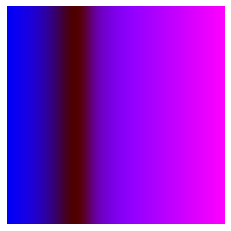

In [13]:
plt.imshow(transformed_data[0][1])
plt.axis('off')

* Generating the summary of trained model to verify the outputs or CNN structure

In [14]:
trained_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 18)      504       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 36)      5868      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 54)      17550     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 72)      35064     
_________________________________________________________________
global_max_pooling2d (Global (None, 72)                0         
_________________________________________________________________
dense (Dense)                (None, 4)                 292   

## Step 4: Generating Feature Maps

The `feature_map` function requires following parameters:
* an image array
* trained model
* Number of classes on which model is trained
* layer num from which you want to see the output
* save argument to save the feature maps on disk

### Plotting featuremap for specific layer

The output is from layer 1, conv2d with               shape (None, 100, 100, 18)


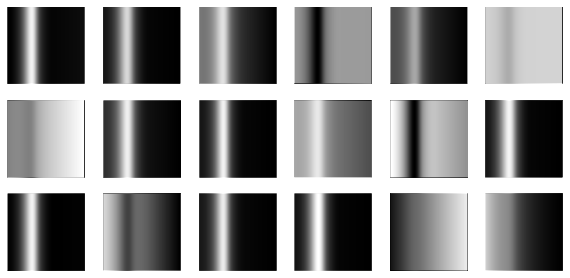

In [16]:
featuremap = hardy.feature_map(image_1, trained_model, 4, 100, layer_num=1, save=False)

### Feature prediction from last layer

In [17]:
featuremap = hardy.feature_map(image_1, trained_model, 4, 100, layer_num='last', save=False)

The output from final layer is [[3.5393469e-02 6.4015883e-05 6.0268473e-03 9.5851564e-01]]


Please note that the `layer_num` is changed from integer value to string value of `last` to get the output from final layer

### Plotting feature maps from all Convolutional Layers

The output is from layer 0, input_1 with               shape (None, 100, 100, 3)
The output is from layer 1, conv2d with               shape (None, 100, 100, 18)
The output is from layer 2, conv2d_1 with               shape (None, 100, 100, 36)
The output is from layer 3, conv2d_2 with               shape (None, 100, 100, 54)
The output is from layer 4, conv2d_3 with               shape (None, 100, 100, 72)


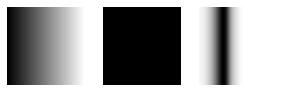

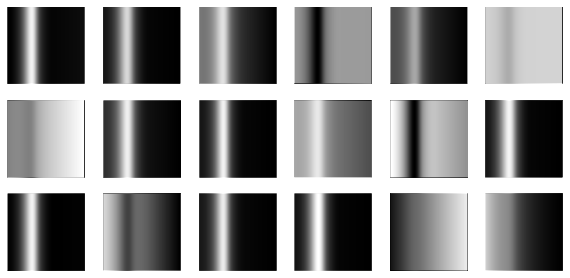

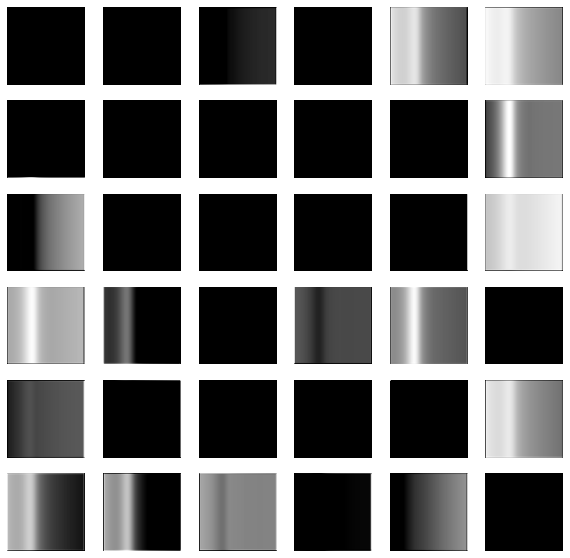

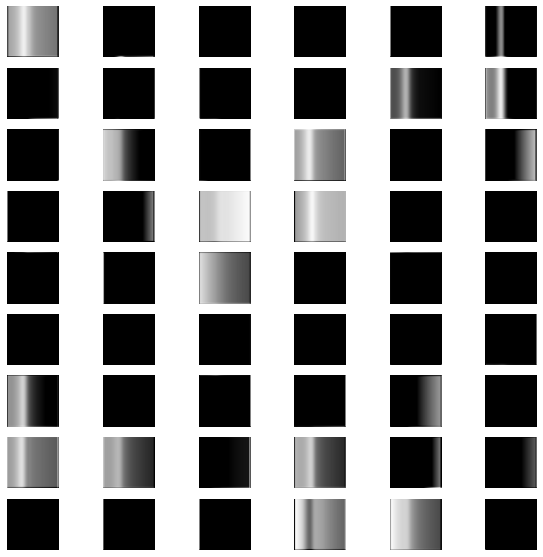

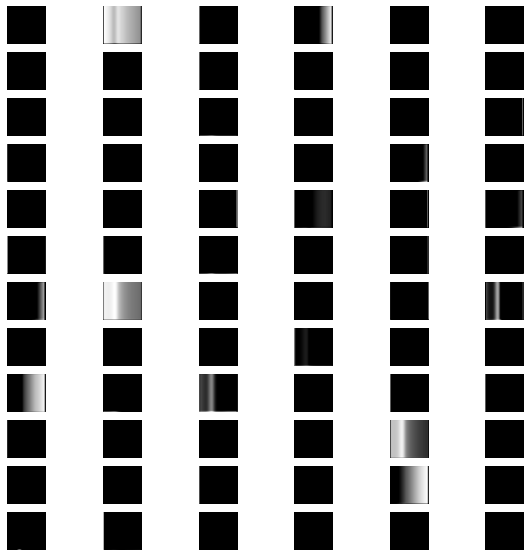

In [18]:
featuremap = hardy.feature_map(image_1, trained_model, 4, 100, save=False)

Please note that the `layer_num` argument hasn't been used. By default, its value is `None`

___